# Data Collection

In [93]:
import pandas as pd
import tensorflow as tf
import numpy as np
import os
import conda_installer
from rdkit import Chem
from deepchem.feat.graph_features import atom_features as get_atom_features
import rdkit
import pickle

In [2]:
#PDBs = {}
df_info = pd.read_csv("Datasets/Mobley/info.csv")

In [4]:
df_info.columns

Index(['ID', 'dataset group name', 'Dataset Name', 'Host', 'Guest',
       'Ex _G_(kcal/mol)', 'Ex _G_SEM', 'EX _H_(kcal/mol)', 'EX _H_SEM',
       'pb_guest_Etot', 'pb_guest_VDWAALS', 'pb_guest_EELEC', 'pb_guest_EPB',
       'pb_guest_ECAVITY', 'pb_host_Etot', 'pb_host_VDWAALS', 'pb_host_EELEC',
       'pb_host_EPB', 'pb_host_ECAVITY', 'pb_complex_Etot',
       'pb_complex_VDWAALS', 'pb_complex_EELEC', 'pb_complex_EPB',
       'pb_complex_ECAVITY', 'gb_Complex_Etot', 'gb_Complex_1-4EEL',
       'gb_Complex_EELEC', 'gb_Complex_EGB', 'gb_Complex_ESURF',
       'gb_guest_Etot', 'gb_guest_1-4EEL', 'gb_guest_EELEC', 'gb_guest_EGB',
       'gb_guest_ESURF', 'gb_host_Etot', 'gb_host_1-4EEL', 'gb_host_EELEC',
       'gb_host_EGB', 'gb_host_ESURF', 'gb_delta_H', 'pb_delta_H',
       'EX _delta_H_(kcal/mol)', 'gb_Ex_difference',
       'SQR_gbnsr6_Ex_difference', 'pb_Ex_difference'],
      dtype='object')

In [5]:
#columns of physics based parameters 
[c for c in df_info.columns if ('Etot' not in c) and ('delta' not in c)and ('Ex_difference' not in c) and ('gb_' in c or 'VDWAALS' in c)]

['pb_guest_VDWAALS',
 'pb_host_VDWAALS',
 'pb_complex_VDWAALS',
 'gb_Complex_1-4EEL',
 'gb_Complex_EELEC',
 'gb_Complex_EGB',
 'gb_Complex_ESURF',
 'gb_guest_1-4EEL',
 'gb_guest_EELEC',
 'gb_guest_EGB',
 'gb_guest_ESURF',
 'gb_host_1-4EEL',
 'gb_host_EELEC',
 'gb_host_EGB',
 'gb_host_ESURF']

In [232]:
# df_all = pd.DataFrame({'Ids': [], 'pb_host_VDWAALS': [], 'pb_guest_VDWAALS': [], 'pb_complex_VDWAALS': [],'gb_host_1-4EEL': [], 'gb_guest_1-4EEL': [], 'gb_Complex_1-4EEL': [], 'gb_host_EELEC': [], 'gb_guest_EELEC': [], 'gb_Complex_EELEC': [], 'gb_host_EGB': [], 'gb_guest_EGB': [], 'gb_Complex_EGB': [], 'gb_host_ESURF': [], 'gb_guest_ESURF': [], 'gb_Complex_ESURF': [], 'Ex _G_(kcal/mol)':[]})

In [233]:
df_all.columns

Index(['Ids', 'pb_host_VDWAALS', 'pb_guest_VDWAALS', 'pb_complex_VDWAALS',
       'gb_host_1-4EEL', 'gb_guest_1-4EEL', 'gb_Complex_1-4EEL',
       'gb_host_EELEC', 'gb_guest_EELEC', 'gb_Complex_EELEC', 'gb_host_EGB',
       'gb_guest_EGB', 'gb_Complex_EGB', 'gb_host_ESURF', 'gb_guest_ESURF',
       'gb_Complex_ESURF', 'Ex _G_(kcal/mol)'],
      dtype='object')

In [234]:
len(df_all)

0

In [8]:
#Ex _G_(kcal/mol) - output value is also known as Experimental data

# cd-set1

In [239]:
df_host_guest = pd.read_csv('/Users/libinathomas/repos/test/cd-set1.csv')
host_guest_arr = df_host_guest['Ex _G_(kcal/mol)'].to_numpy()
df_cd_set1 = pd.DataFrame({'Ids': [], 'pb_host_VDWAALS': [], 'pb_guest_VDWAALS': [], 'pb_complex_VDWAALS': [],'gb_host_1-4EEL': [], 'gb_guest_1-4EEL': [], 'gb_Complex_1-4EEL': [], 'gb_host_EELEC': [], 'gb_guest_EELEC': [], 'gb_Complex_EELEC': [], 'gb_host_EGB': [], 'gb_guest_EGB': [], 'gb_Complex_EGB': [], 'gb_host_ESURF': [], 'gb_guest_ESURF': [], 'gb_Complex_ESURF': [], 'Ex _G_(kcal/mol)':[]})
#df_cd_set1 = pd.DataFrame() 

rows_list = []
for i in range(len(host_guest_arr)):
    Ids = 'cd-set1--' + df_host_guest.iloc[i]['Host'] + '-' + df_host_guest.iloc[i]['Guest']
    
   # Collect each row as a dictionary
    row = {
        'Ids': Ids,
        'pb_host_VDWAALS': df_host_guest.iloc[i]['pb_host_VDWAALS'],
        'pb_guest_VDWAALS': df_host_guest.iloc[i]['pb_guest_VDWAALS'],
        'pb_complex_VDWAALS': df_host_guest.iloc[i]['pb_complex_VDWAALS'],
        'gb_host_1-4EEL': df_host_guest.iloc[i]['gb_host_1-4EEL'],
        'gb_guest_1-4EEL': df_host_guest.iloc[i]['gb_guest_1-4EEL'],
        'gb_Complex_1-4EEL': df_host_guest.iloc[i]['gb_Complex_1-4EEL'],
        'gb_host_EELEC': df_host_guest.iloc[i]['gb_host_EELEC'],
        'gb_guest_EELEC': df_host_guest.iloc[i]['gb_guest_EELEC'],
        'gb_Complex_EELEC': df_host_guest.iloc[i]['gb_Complex_EELEC'],
        'gb_host_EGB': df_host_guest.iloc[i]['gb_host_EGB'],
        'gb_guest_EGB': df_host_guest.iloc[i]['gb_guest_EGB'],
        'gb_Complex_EGB': df_host_guest.iloc[i]['gb_Complex_EGB'],
        'gb_host_ESURF': df_host_guest.iloc[i]['gb_host_ESURF'],
        'gb_guest_ESURF': df_host_guest.iloc[i]['gb_guest_ESURF'],
        'gb_Complex_ESURF': df_host_guest.iloc[i]['gb_Complex_ESURF'],
        'Ex _G_(kcal/mol)':-df_host_guest.iloc[i]['Ex _G_(kcal/mol)']
    }
    
    rows_list.append(row)
# Step to concatenate the new rows into df_cd_set1
df_cd_set1 = pd.concat([df_cd_set1, pd.DataFrame(rows_list)], ignore_index=True)


In [253]:
# df_cd_set1

In [246]:
# df_all = pd.concat([df_all, df_cd_set1], ignore_index=True)

In [247]:
len(df_all)

22

In [140]:
path = '/Users/libinathomas/repos/test/Datasets/Mobley/cd-set1/pdb/'

host_pdb = Chem.MolFromPDBFile(path + 'host-acd.pdb')

all_guest_files = os.listdir(path)
guest_files = [file for file in all_guest_files if 'host' not in file.lower() and file.endswith('.pdb')]
guest_pdb = [Chem.MolFromPDBFile(path + guest_files[i]) for i in range(len(guest_files))]

PDBs_acd = {'cd-set1--acd-%s'%guest_files[i].split('.')[0].replace('-s', '-'): Chem.CombineMols(host_pdb, guest_pdb[i]) for i in range(len(guest_files))}

#PDBs.update(PDBs_acd)

In [151]:
#PDBs.update(PDBs_acd)

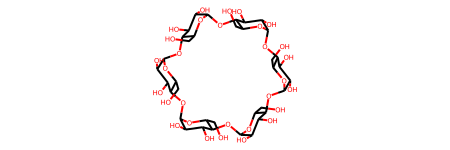

In [46]:
# host_pdb

In [149]:
# pkl_file = open('PDBs_RDKit.pkl', 'wb')
# pickle.dump(PDBs, pkl_file)
# pkl_file.close()

# DPBs = pickle.load(open('PDBs_RDKit.pkl', 'rb'))
# DPBs['cd-set1--guest-20']

In [146]:
#PDBs

In [147]:
#PDBs_acd

# cd-set-2

In [241]:
df_host_guest = pd.read_csv("/Users/libinathomas/repos/test/cd-set2.csv")
df_cd_set2 = pd.DataFrame({'Ids': [], 'pb_host_VDWAALS': [], 'pb_guest_VDWAALS': [], 'pb_complex_VDWAALS': [],'gb_host_1-4EEL': [], 'gb_guest_1-4EEL': [], 'gb_Complex_1-4EEL': [], 'gb_host_EELEC': [], 'gb_guest_EELEC': [], 'gb_Complex_EELEC': [], 'gb_host_EGB': [], 'gb_guest_EGB': [], 'gb_Complex_EGB': [], 'gb_host_ESURF': [], 'gb_guest_ESURF': [], 'gb_Complex_ESURF': [], 'Ex _G_(kcal/mol)':[]})
host_guest_arr = df_host_guest['Ex _G_(kcal/mol)'].to_numpy()

rows_list = []
for i in range(len(host_guest_arr)):
    Ids = 'cd-set2--' + df_host_guest.iloc[i]['Host'] + '-' + df_host_guest.iloc[i]['Guest']
    
   # Collect each row as a dictionary
    row = {
        'Ids': Ids,
        'pb_host_VDWAALS': df_host_guest.iloc[i]['pb_host_VDWAALS'],
        'pb_guest_VDWAALS': df_host_guest.iloc[i]['pb_guest_VDWAALS'],
        'pb_complex_VDWAALS': df_host_guest.iloc[i]['pb_complex_VDWAALS'],
        'gb_host_1-4EEL': df_host_guest.iloc[i]['gb_host_1-4EEL'],
        'gb_guest_1-4EEL': df_host_guest.iloc[i]['gb_guest_1-4EEL'],
        'gb_Complex_1-4EEL': df_host_guest.iloc[i]['gb_Complex_1-4EEL'],
        'gb_host_EELEC': df_host_guest.iloc[i]['gb_host_EELEC'],
        'gb_guest_EELEC': df_host_guest.iloc[i]['gb_guest_EELEC'],
        'gb_Complex_EELEC': df_host_guest.iloc[i]['gb_Complex_EELEC'],
        'gb_host_EGB': df_host_guest.iloc[i]['gb_host_EGB'],
        'gb_guest_EGB': df_host_guest.iloc[i]['gb_guest_EGB'],
        'gb_Complex_EGB': df_host_guest.iloc[i]['gb_Complex_EGB'],
        'gb_host_ESURF': df_host_guest.iloc[i]['gb_host_ESURF'],
        'gb_guest_ESURF': df_host_guest.iloc[i]['gb_guest_ESURF'],
        'gb_Complex_ESURF': df_host_guest.iloc[i]['gb_Complex_ESURF'],
        'Ex _G_(kcal/mol)':-df_host_guest.iloc[i]['Ex _G_(kcal/mol)']
    }
    
    rows_list.append(row)
# Step to concatenate the new rows into df_cd_set2
df_cd_set2 = pd.concat([df_cd_set2, pd.DataFrame(rows_list)], ignore_index=True)

In [254]:
# df_cd_set2

In [248]:
df_all = pd.concat([df_all, df_cd_set2], ignore_index=True)

In [249]:
len(df_all)

43

In [162]:
path = '/Users/libinathomas/repos/test/Datasets/Mobley/cd-set2/pdb/'

host_pdb = Chem.MolFromPDBFile(path + 'host-bcd.pdb')

all_guest_files = os.listdir(path)
guest_files = [file for file in all_guest_files if 'host' not in file.lower() and file.endswith('.pdb')]
guest_pdb = [Chem.MolFromPDBFile(path + guest_files[i]) for i in range(len(guest_files))]

PDBs_bcd = {'cd-set2--bcd-%s'%guest_files[i].split('.')[0].replace('-s', '-'): Chem.CombineMols(host_pdb, guest_pdb[i]) for i in range(len(guest_files))}

#PDBs.update(PDBs_bcd)

In [164]:
PDBs.update(PDBs_bcd)

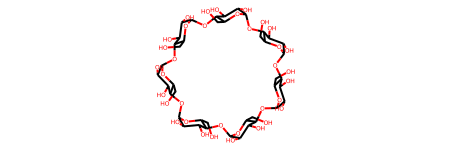

In [109]:
host_pdb  #bcd host

In [166]:
#PDBs

# gdcc-set1

In [243]:
df_host_guest = pd.read_csv("/Users/libinathomas/repos/test/gdcc-set1.csv")
df_gdcc_set1 = pd.DataFrame({'Ids': [], 'pb_host_VDWAALS': [], 'pb_guest_VDWAALS': [], 'pb_complex_VDWAALS': [],'gb_host_1-4EEL': [], 'gb_guest_1-4EEL': [], 'gb_Complex_1-4EEL': [], 'gb_host_EELEC': [], 'gb_guest_EELEC': [], 'gb_Complex_EELEC': [], 'gb_host_EGB': [], 'gb_guest_EGB': [], 'gb_Complex_EGB': [], 'gb_host_ESURF': [], 'gb_guest_ESURF': [], 'gb_Complex_ESURF': [], 'Ex _G_(kcal/mol)':[]})
host_guest_arr = df_host_guest['Ex _G_(kcal/mol)'].to_numpy()

rows_list = []
for i in range(len(host_guest_arr)):
    Ids = 'gdcc-set1--' + df_host_guest.iloc[i]['Host'] + '-' + df_host_guest.iloc[i]['Guest']
    
   # Collect each row as a dictionary
    row = {
        'Ids': Ids,
        'pb_host_VDWAALS': df_host_guest.iloc[i]['pb_host_VDWAALS'],
        'pb_guest_VDWAALS': df_host_guest.iloc[i]['pb_guest_VDWAALS'],
        'pb_complex_VDWAALS': df_host_guest.iloc[i]['pb_complex_VDWAALS'],
        'gb_host_1-4EEL': df_host_guest.iloc[i]['gb_host_1-4EEL'],
        'gb_guest_1-4EEL': df_host_guest.iloc[i]['gb_guest_1-4EEL'],
        'gb_Complex_1-4EEL': df_host_guest.iloc[i]['gb_Complex_1-4EEL'],
        'gb_host_EELEC': df_host_guest.iloc[i]['gb_host_EELEC'],
        'gb_guest_EELEC': df_host_guest.iloc[i]['gb_guest_EELEC'],
        'gb_Complex_EELEC': df_host_guest.iloc[i]['gb_Complex_EELEC'],
        'gb_host_EGB': df_host_guest.iloc[i]['gb_host_EGB'],
        'gb_guest_EGB': df_host_guest.iloc[i]['gb_guest_EGB'],
        'gb_Complex_EGB': df_host_guest.iloc[i]['gb_Complex_EGB'],
        'gb_host_ESURF': df_host_guest.iloc[i]['gb_host_ESURF'],
        'gb_guest_ESURF': df_host_guest.iloc[i]['gb_guest_ESURF'],
        'gb_Complex_ESURF': df_host_guest.iloc[i]['gb_Complex_ESURF'],
        'Ex _G_(kcal/mol)':-df_host_guest.iloc[i]['Ex _G_(kcal/mol)']
    }
    
    rows_list.append(row)
# Step to concatenate the new rows into df_cd_set1
df_gdcc_set1 = pd.concat([df_gdcc_set1, pd.DataFrame(rows_list)], ignore_index=True)


In [255]:
# df_gdcc_set1

In [250]:
# df_all = pd.concat([df_all, df_gdcc_set1], ignore_index=True)

In [256]:
# df_all.tail()

In [217]:
path = '/Users/libinathomas/repos/test/Datasets/Mobley/gdcc-set1/pdb/'

host_pdb_oa = Chem.MolFromPDBFile(path + 'host-oa.pdb')
host_pdb_temoa = Chem.MolFromPDBFile(path + 'host-temoa.pdb')

all_guest_files = os.listdir(path)
guest_files = [file for file in all_guest_files if 'host' not in file.lower() and file.endswith('.pdb')]
guest_pdb = [Chem.MolFromPDBFile(path + guest_files[i]) for i in range(len(guest_files))]

PDBs_oa = {'gdcc-set1--oa-%s'%guest_files[i].split('.')[0]: Chem.CombineMols(host_pdb_oa, guest_pdb[i]) for i in range(len(guest_files))}
PDBs_temoa = {'gdcc-set1--temoa-%s' % guest_files[i].split('.')[0]: Chem.CombineMols(host_pdb_temoa, guest_pdb[i])
              for i in range(len(guest_files)) if 'guest-6' not in guest_files[i] and 'guest-8' not in guest_files[i]}
#PDBs.update(PDBs_bcd)

In [221]:
#PDBs.update(PDBs_oa)
#PDBs.update(PDBs_temoa)

In [230]:
#PDBs

# Pickle files

In [225]:
# pkl_file = open('PDBs_RDKit_HG.pkl', 'wb')
# pickle.dump(PDBs, pkl_file)
# pkl_file.close()

# PDBs_pickled = pickle.load(open('PDBs_RDKit_HG.pkl', 'rb'))

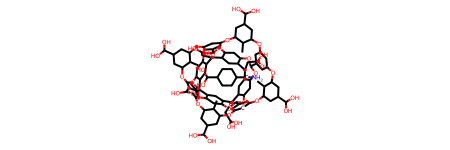

In [229]:
PDBs_pickled['gdcc-set1--temoa-guest-5']

In [257]:
# df_all

In [258]:
df = df_all.dropna()

In [259]:
df

,Ids,pb_host_VDWAALS,pb_guest_VDWAALS,pb_complex_VDWAALS,gb_host_1-4EEL,gb_guest_1-4EEL,gb_Complex_1-4EEL,gb_host_EELEC,gb_guest_EELEC,gb_Complex_EELEC,gb_host_EGB,gb_guest_EGB,gb_Complex_EGB,gb_host_ESURF,gb_guest_ESURF,gb_Complex_ESURF,Ex _G_(kcal/mol)
0,cd-set1--acd-guest-1,-28.5717,-0.0564,-40.2895,423.5761,12.2487,435.8248,-428.9520,16.4764,-402.7811,-96.4471,-67.4372,-162.2809,5.1691,1.4344,4.9718,1.575
1,cd-set1--acd-guest-2,-27.1334,-0.3831,-44.0766,412.6663,16.3135,428.9798,-397.9784,11.5637,-376.0288,-106.4154,-66.7869,-176.4630,5.0726,1.7438,4.9888,3.533
2,cd-set1--acd-guest-3,-29.0930,-0.6493,-48.7146,426.2925,16.8092,443.1017,-429.3068,11.3698,-410.1856,-95.2452,-66.0578,-163.6184,5.1352,2.0628,5.3270,4.606
3,cd-set1--acd-guest-4,-29.6231,-0.0159,-43.0228,420.0687,-30.3678,389.7009,-416.5215,11.2809,-405.0136,-97.4461,-8.8723,-102.2474,5.0849,1.3330,4.9451,2.130
4,cd-set1--acd-guest-5,-28.8169,-0.9041,-46.8309,425.7315,-10.9172,414.8143,-435.9689,5.6626,-431.7111,-91.2312,-7.8776,-93.5205,5.0881,1.5514,5.0142,2.510
5,cd-set1--acd-guest-6,-29.5037,-0.1800,-43.3678,422.4095,-13.2848,409.1247,-421.3737,20.7874,-423.2347,-99.7968,-81.2432,-149.0374,5.1792,1.3182,4.9746,1.506
6,cd-set1--acd-guest-7,-32.1483,-0.7283,-50.3230,422.3651,10.4248,432.7899,-398.7469,5.2092,-413.3124,-106.3300,-80.0113,-159.1988,5.0312,1.6538,4.9003,3.380
7,cd-set1--acd-guest-8,-29.7414,-0.9808,-50.1526,418.4633,2.5746,421.0379,-421.1437,7.8669,-423.2391,-95.0137,-81.1751,-160.6604,5.1211,1.9750,5.1423,4.622
8,cd-set1--acd-guest-9,-30.3947,-0.1053,-45.8539,426.4985,25.8558,452.3543,-421.9704,17.6653,-391.3273,-93.9633,-61.6305,-154.2182,5.2166,1.6020,5.0340,1.685
9,cd-set1--acd-guest-10,-30.6008,0.1404,-45.5654,421.9775,-70.0804,351.8971,-406.1717,75.8586,-313.0269,-103.9776,-63.6179,-172.2139,5.0478,1.5382,4.9310,1.764


In [260]:
df.to_csv('Final_data.csv')